In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('./data/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.shape

(100000, 9)

<Axes: xlabel='diabetes'>

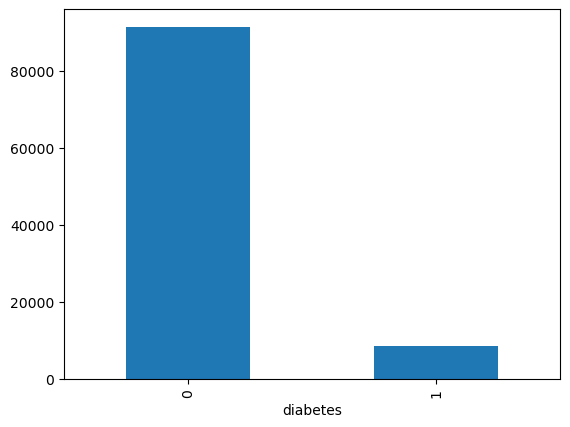

In [6]:
df['diabetes'].value_counts().plot(kind='bar')

In [7]:
corr = df.corr(numeric_only=True)
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<Axes: >

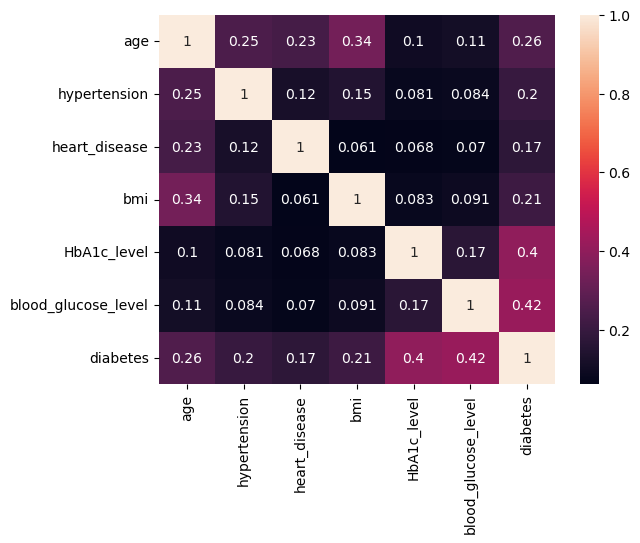

In [8]:
sns.heatmap(corr, annot=True)

# Data Cleaning 

In [9]:
df.sample(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
15077,Male,38.0,0,0,never,36.62,6.5,155,0
88563,Female,12.0,0,0,No Info,16.03,4.8,85,0
58855,Female,14.0,0,0,No Info,18.30,6.5,160,0


[]

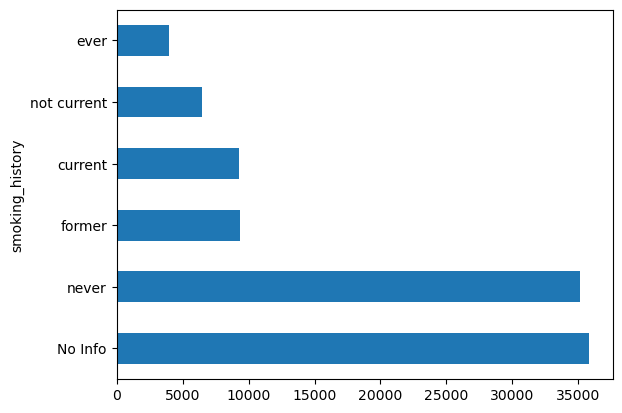

In [10]:
df['smoking_history'].value_counts().plot(kind='barh')
plt.plot()

Since our `smoking_history` has a lot of no_info which is of n imortance to the model training we will have to drop the whole column


In [11]:
df.drop(['smoking_history'], axis=1, inplace=True)

In [12]:
df.sample(3)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
2630,Female,41.0,0,0,37.54,4.0,158,0
42137,Female,41.0,0,0,28.15,4.5,80,0
60821,Female,32.0,0,0,20.02,4.0,90,0


<Axes: xlabel='gender'>

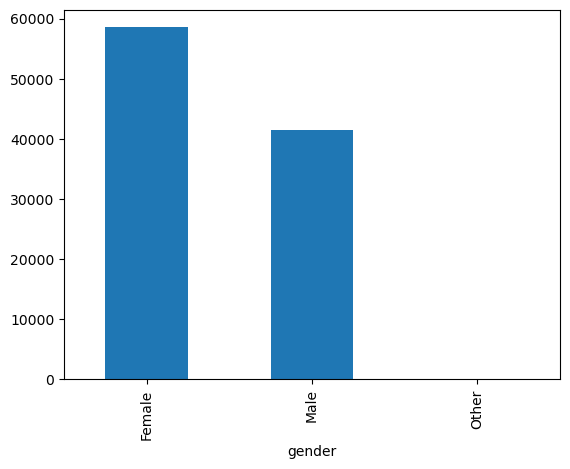

In [13]:
df['gender'].value_counts().plot(kind='bar')

In [14]:
df = df[df['gender'] != 'Other']

<Axes: xlabel='gender'>

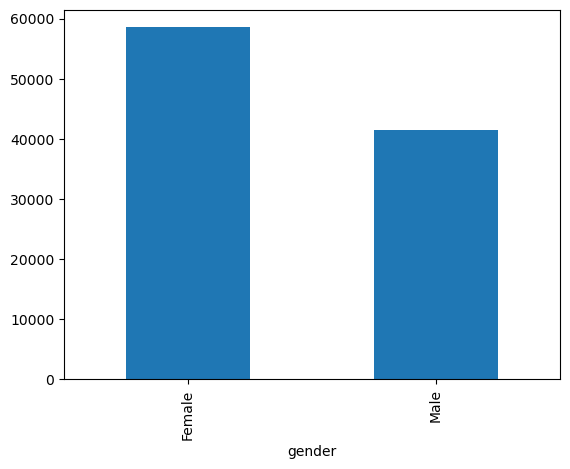

In [15]:
df['gender'].value_counts().plot(kind='bar')

In [16]:
df.shape

(99982, 8)

In [17]:
df.sample(3)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
92980,Female,61.0,0,0,22.00,6.6,126,0
76748,Female,73.0,0,0,27.32,6.5,100,0
24000,Male,12.0,0,0,27.32,5.7,130,0


<Axes: xlabel='0'>

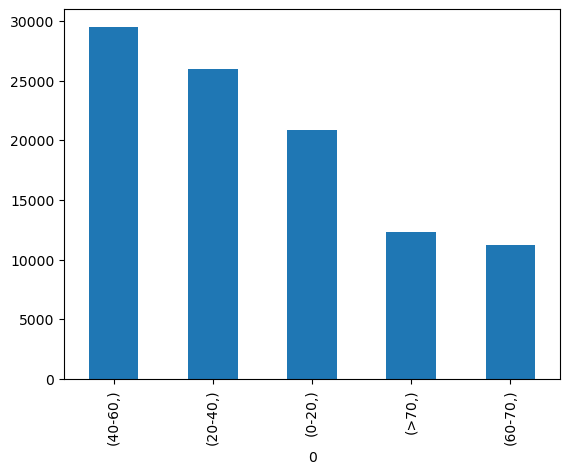

In [18]:
age_distribution = pd.cut(df['age'].values, bins=[0, 20, 40, 60, 70, np.inf], labels=['0-20', '20-40', '40-60', '60-70', '>70'])
age_distribution = age_distribution.astype('str')
pd.DataFrame(age_distribution).value_counts().plot(kind='bar')

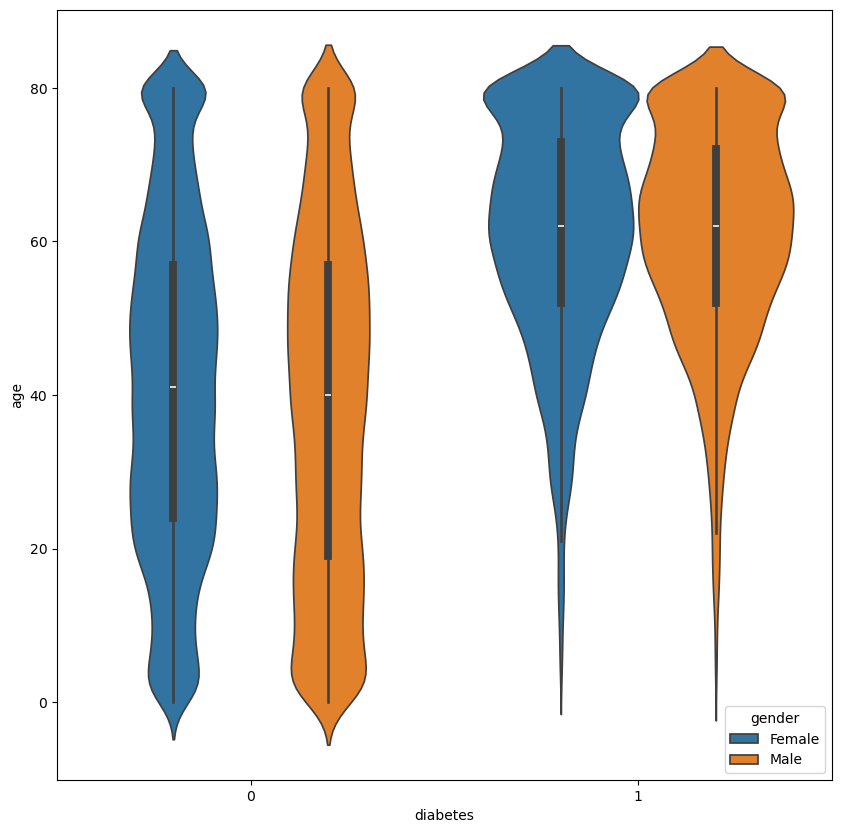

In [19]:
plt.figure(figsize = (10, 10))
sns.violinplot(df, x='diabetes', y='age', hue='gender')
plt.show()

In [20]:
df.sample(3)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
20249,Male,29.0,0,0,30.56,3.5,130,0
63515,Female,80.0,0,0,25.06,6.5,80,0
52973,Male,64.0,0,0,27.32,7.5,260,1


In [21]:
df[['hypertension', 'heart_disease']]

,hypertension,heart_disease
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
99995,0,0
99996,0,0
99997,0,0
99998,0,0


<Axes: xlabel='hypertension'>

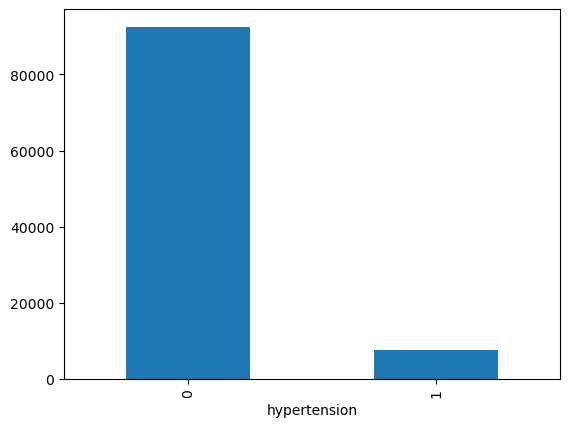

In [22]:
df['hypertension'].value_counts().plot(kind='bar')

<Axes: xlabel='heart_disease'>

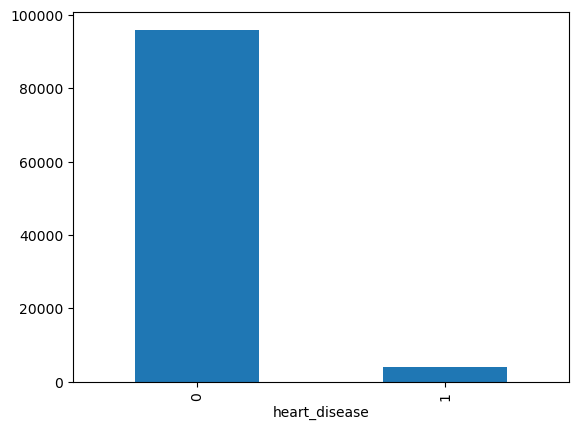

In [23]:
df['heart_disease'].value_counts().plot(kind='bar')

In [24]:
df = df.drop(['hypertension', 'heart_disease'], axis=1)

In [25]:
X = df.drop('diabetes', axis=1).copy()
y = df.loc[:, 'diabetes'].copy()

In [26]:
rus = RandomUnderSampler(random_state=42)
under_sampled_X, under_sampled_y = rus.fit_resample(X, y)

In [27]:
under_sampled_X.shape, under_sampled_y.shape, df.shape

((17000, 5), (17000,), (99982, 6))

In [28]:
ros = RandomOverSampler(random_state=42)
over_sampled_X, over_sampled_y = ros.fit_resample(X, y)

In [29]:
over_sampled_X.shape, over_sampled_y.shape, df.shape

((182964, 5), (182964,), (99982, 6))

In [30]:
ct = ColumnTransformer([
    ('encoding', OneHotEncoder(), ['gender']),
    ('scaling', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])
])

In [31]:
preprocessed_X = ct.fit_transform(under_sampled_X)

In [32]:
preprocessed_X.shape

(17000, 6)

In [33]:
ct

ColumnTransformer(transformers=[('encoding', OneHotEncoder(), ['gender']),
                                ('scaling', StandardScaler(),
                                 ['age', 'bmi', 'HbA1c_level',
                                  'blood_glucose_level'])])

In [34]:
under_sampled_X.shape, under_sampled_y.shape

((17000, 5), (17000,))

In [35]:
train_X, test_X, train_y, test_y = train_test_split(preprocessed_X, under_sampled_y, test_size=.2, random_state = 42)

In [36]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((13600, 6), (3400, 6), (13600,), (3400,))

In [37]:
def measure_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        'accuracy': acc,
        "recall": recall,
        "precision": precision,
        "f1": f1
    }

In [38]:
xgb = XGBClassifier(random_state=42, learning_rate = 0.03)
rf = RandomForestClassifier(random_state = 42)
tree = DecisionTreeClassifier(random_state=42)

In [39]:
xgb.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
rf.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [41]:
tree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

In [42]:
xgb_pred = xgb.predict(test_X)

In [43]:
rf_pred = rf.predict(test_X)

In [44]:
tree_pred = tree.predict(test_X)

In [45]:
measure_model(test_y, xgb_pred)

{'accuracy': 0.8988235294117647,
 'recall': 0.9311150029188558,
 'precision': 0.8758923668314114,
 'f1': 0.9026598754951896}

In [46]:
measure_model(test_y, rf_pred)

{'accuracy': 0.8947058823529411,
 'recall': 0.9013426736719206,
 'precision': 0.8909405654933641,
 'f1': 0.8961114335461404}

In [47]:
measure_model(test_y, tree_pred)

{'accuracy': 0.87,
 'recall': 0.8663164039696439,
 'precision': 0.8744843842074249,
 'f1': 0.8703812316715542}

In [48]:
pickle.dump(xgb, open('resources/best_diabetes_model.pkl', 'wb'))

In [49]:
pickle.dump(ct, open('resources/transformer.pkl', 'wb'))

In [50]:
good_df = pd.concat([under_sampled_X, under_sampled_y], axis=1)

In [51]:
good_df.to_csv('data/best_df.csv')